In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [27]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			  break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [32]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_features = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [33]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [34]:
X.shape

(6, 3)

In [35]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### **Building LSTM Model**

In [36]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 28675.9473
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 27837.3125
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 27112.3223
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 26473.8574
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 25786.5781
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 25023.6250
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 24228.3457
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 23413.2441
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 22574.8125
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 21720.1035
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 20849.1035
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 19949.7676
Epoch 13/30

### **Predicting For the next 10 data**

In [37]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.75725]
1 day input [196.         210.         222.75724792]
1 day output [[233.709]]
2 day input [210.         222.75724792 233.70899963]
2 day output [[246.99448]]
3 day input [222.75725 233.709   246.99448]
3 day output [[259.6033]]
4 day input [233.709   246.99448 259.6033 ]
4 day output [[272.04376]]
5 day input [246.99448 259.6033  272.04376]
5 day output [[285.70602]]
6 day input [259.6033  272.04376 285.70602]
6 day output [[299.2366]]
7 day input [272.04376 285.70602 299.2366 ]
7 day output [[313.16904]]
8 day input [285.70602 299.2366  313.16904]
8 day output [[327.91754]]
9 day input [299.2366  313.16904 327.91754]
9 day output [[342.92938]]
[222.75725, 233.709, 246.99448, 259.6033, 272.04376, 285.70602, 299.2366, 313.16904, 327.91754, 342.92938]


In [38]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [39]:
len(timeseries_data)

9

In [40]:
lst_output

[222.75725,
 233.709,
 246.99448,
 259.6033,
 272.04376,
 285.70602,
 299.2366,
 313.16904,
 327.91754,
 342.92938]

### **Visualizaing The Output**

In [41]:
import matplotlib.pyplot as plt

In [42]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

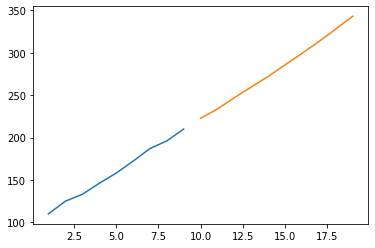

In [43]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)